In [52]:
import tensorflow as tf

import time
import numpy as np
import matplotlib.pyplot as plt

In [53]:
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import os
import io
import time

from bpemb import BPEmb

In [71]:
bpemb_de = BPEmb(lang='de', vs=10000, dim=100)
bpemb_en = BPEmb(lang='en', vs=10000, dim=100)

In [60]:
path_to_file = "/Users/tamurataito/.keras/datasets/deu-eng/deu.txt"

lines = io.open(path_to_file, encoding='UTF-8').read().strip().split('\n')

temp_list = []
corpus = []

for i in range(len(lines)):
    temp_list =  lines[i].split('\t')[:-1]
    corpus.append(temp_list)
    

In [64]:
en, de = np.array(corpus).T

en_encoded = []
de_encoded = []

cnt_en = 0
cnt_de = 0

for i in range(len(en)):
    en_encoded_temp = bpemb_en.encode_ids(en[i])
    de_encoded_temp = bpemb_de.encode_ids(de[i])
    
    """
    if 0 in en_encoded_temp:
        cnt_en = cnt_en + 1
        print(en[i])
        print(en_encoded_temp)
        print()
    
    if 0 in de_encoded_temp:
        cnt_de = cnt_de + 1
        print(de[i])
        print(de_encoded_temp)
        print()
    """
    
    if (len(en_encoded_temp)<=40) and (len(de_encoded_temp)<=40):
        en_encoded.append([10000] + en_encoded_temp + [10001])
        de_encoded.append([10000] + de_encoded_temp + [10001])
    

In [66]:
en_padded = tf.keras.preprocessing.sequence.pad_sequences(en_encoded, padding='post')
de_padded = tf.keras.preprocessing.sequence.pad_sequences(de_encoded, padding='post')

In [68]:
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(en_padded, de_padded, test_size=0.2)


In [195]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = 10000 + 2
vocab_tar_size = 10000 + 2

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
print(dataset)

dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
print(dataset)

<ShuffleDataset shapes: ((41,), (42,)), types: (tf.int32, tf.int32)>
<BatchDataset shapes: ((64, 41), (64, 42)), types: (tf.int32, tf.int32)>


In [89]:
next(iter(dataset))


(<tf.Tensor: shape=(64, 41), dtype=int32, numpy=
 array([[10000,   386,  2361, ...,     0,     0,     0],
        [10000,   415,  3286, ...,     0,     0,     0],
        [10000,    83,   261, ...,     0,     0,     0],
        ...,
        [10000,  5491,    42, ...,     0,     0,     0],
        [10000,   386,  1569, ...,     0,     0,     0],
        [10000,   386,  9937, ...,     0,     0,     0]], dtype=int32)>,
 <tf.Tensor: shape=(64, 42), dtype=int32, numpy=
 array([[10000,  3077,   185, ...,     0,     0,     0],
        [10000,  5346,  3731, ...,     0,     0,     0],
        [10000,    60,   284, ...,     0,     0,     0],
        ...,
        [10000,  2902,  9940, ...,     0,     0,     0],
        [10000,  5702,  9919, ...,     0,     0,     0],
        [10000,  3077,   571, ...,     0,     0,     0]], dtype=int32)>)

In [88]:
for (batch, (inp, tar)) in enumerate(train_dataset):
    if batch==10: 
        break
    print(tf.shape(inp))
    print(tf.shape(tar))
    tf.print(inp, summarize=-1)
    tf.print(tar, summarize=-1)
    print()
    
    #print("The shape of 'inp' is " + str(tf.shape(inp)))
    #print("The shape of 'tar' is " + str(tf.shape(tar)))
    


tf.Tensor([64 40], shape=(2,), dtype=int32)
tf.Tensor([64 40], shape=(2,), dtype=int32)
[[8214 66 5175 484 5 3 709 19 1244 3037 465 7 3819 19 573 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 74 210 8003 38 5 7788 7 8 714 29 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 32 6 1568 177 104 1 125 254 277 7957 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 5829 429 8003 22 4 856 393 5201 12 2000 670 1438 8073 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 53 84 5 2965 90 12 8013 1480 6684 17 23 124 6326 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 59 137 1 4060 1 7 209 261 19 98 1483 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 46 526 4 189 35 2507 4 8077 1 5 6824 12 5402 17 4 142 298 4928 6517 17 24 870 4081 3638 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 390 3 5 27 4004 8055 1 13 248 105 2550 255 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 11 5061 54 967 


tf.Tensor([64 38], shape=(2,), dtype=int32)
tf.Tensor([64 40], shape=(2,), dtype=int32)
[[8214 25 7 5 344 8 5 13 2041 1 24 215 1 10 699 2819 4 3447 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 195 1 66 150 5185 90 22 261 4 682 4 1170 6 4567 200 8003 348 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 77 1183 8003 38 3395 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 8 1234 6279 597 1 13 49 7444 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 852 5 54 1299 4 666 3117 13 16 662 4552 7990 80 140 4164 8073 1 25 3 63 243 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 103 1157 491 1737 1 14 5405 1839 3446 4308 2617 1 6 3 1839 3446 4308 2617 7990 1185 10 1681 466 2 8215 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 2746 11 3 2104 28 7 5 8 5 730 29 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 13 8 9 418 506 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 25 278 5 8 551 132 7 1178 5 510 361 7 122 778 250 2 82


tf.Tensor([64 39], shape=(2,), dtype=int32)
tf.Tensor([64 39], shape=(2,), dtype=int32)
[[8214 25 216 8 7 109 1031 31 3144 7454 8073 29 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 3 3026 188 653 222 1356 15 5 3 1043 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 67 107 65 47 18 5441 7990 6 1856 94 87 10 1652 22 427 761 1 5158 7740 8003 379 8 131 766 21 1321 9 884 19 4235 7827 366 2 8215 0 0 0 0]
 [8214 23 1868 7990 52 70 7757 1935 197 190 16 1418 29 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 6 296 209 7 6163 1 209 16 1239 7 1376 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 3 752 2902 366 68 8 7 2147 7990 4 3411 7 3587 670 1505 1698 1 35 7 2147 7990 5 4923 6315 7990 190 7 1939 24 5794 24 4 547 2 8215 0 0 0]
 [8214 72 554 20 5 18 45 5 201 7514 3420 50 135 3713 1 48 1364 4 547 1 4 1351 1 3 275 5774 36 162 2332 489 16 7168 3757 2 8215 0 0 0 0]
 [8214 1492 1 7 427 3754 7990 70 10 5616 2658 2 8215 0 0 0 0 0 0 0


tf.Tensor([64 40], shape=(2,), dtype=int32)
tf.Tensor([64 39], shape=(2,), dtype=int32)
[[8214 309 180 5 5092 3 4775 7990 6920 81 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 89 2398 1 324 33 5658 3001 60 7 2057 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 12 1842 922 5060 8067 8003 16 33 104 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 2112 7990 7 209 1131 4 1580 5121 335 7383 1166 13 16 381 20 88 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 32 42 70 3 79 20 188 75 3312 15 9 470 4676 7990 201 51 6643 7097 108 24 5820 664 37 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 67 837 949 1584 2950 3 2924 281 65 13 8 346 592 1 1366 273 29 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 7 4152 7990 13 2914 3089 1 223 1711 1 223 6002 749 1 223 2910 4907 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 2542 3183 8003 279 1 1366 13 332 7 5 7384 28 4903 2842 1 3096 8063 8003 38 2386 14 914 4 691 6 63 


tf.Tensor([64 40], shape=(2,), dtype=int32)
tf.Tensor([64 39], shape=(2,), dtype=int32)
[[8214 32 125 2354 7 270 251 93 136 479 20 190 113 3 1809 8072 238 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 6 13 8 105 7 5 7060 8073 1 25 72 3 4735 3048 36 3745 1 40 7060 17 6 3 858 5 7060 8073 2 8215 0 0 0 0 0 0 0 0 0 0 0]
 [8214 6242 3 26 16 6748 14 5 284 94 49 3 55 42 4 2076 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 1909 1 7456 8069 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 8 42 5 8 4127 22 7449 8069 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 5559 1669 1 7502 8003 22 22 3640 1 7848 169 8003 22 41 1914 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 18 45 5 27 7790 701 7990 7683 1819 8067 8003 16 23 6212 22 871 6 23 75 3 86 2368 24 1112 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 6023 59 4558 11 5 18 45 4404 262 6984 18 219 1413 1739 1 7734 6 7115 226 5004 7180 28 6 114 18 4404 873 20 12 


tf.Tensor([64 40], shape=(2,), dtype=int32)
tf.Tensor([64 36], shape=(2,), dtype=int32)
[[8214 8 21 3463 30 3 69 1719 4 5516 7990 20 3 1719 19 1050 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 2082 4 64 1755 4807 57 7 339 5517 7990 4 9 6326 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 630 22 2213 435 6 989 333 809 628 1609 8061 1 22 6817 847 5242 1105 2778 8072 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 167 6534 7990 9 3169 6324 83 4629 4 2260 1609 17 85 18 45 981 873 3 1125 14 124 3169 6324 97 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 8 3 2735 14 5 3 3447 7990 8 2014 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 60 3 86 1447 377 1 653 8010 853 900 3963 171 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 32 64 3830 93 1909 1 123 104 437 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 5066 20 10 537 5 38 3822 91 42 22 231 3 196 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [


tf.Tensor([64 40], shape=(2,), dtype=int32)
tf.Tensor([64 37], shape=(2,), dtype=int32)
[[8214 886 5420 3 13 8 6501 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 392 5 42 13 8 4960 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 584 13 332 7 5 3368 3 1357 3337 1864 7990 3614 15 131 1234 6279 597 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 27 5854 7 73 2911 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 8 9 1186 767 275 3331 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 1114 1 1576 509 174 43 215 17 5 1355 158 1339 75 5049 7 22 7396 4640 1075 4 8073 412 1001 97 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 35 730 8072 8003 161 8003 492 26 20 9 7209 8069 29 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 227 157 6191 18 5 1236 7990 1125 6548 8055 1 5 3410 6903 3 3 7674 3 4 1635 6 3837 7990 3263 1733 17 11 3984 2 8215 0 0 0 0 0 0 0 0 0]
 [8214 18


tf.Tensor([64 37], shape=(2,), dtype=int32)
tf.Tensor([64 38], shape=(2,), dtype=int32)
[[8214 235 1 1146 322 24 69 1079 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 607 1 13 323 21 1164 20 778 1415 181 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 25 607 1 5079 12 23 6675 7990 208 3405 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 119 1 76 4899 3434 6757 2592 7990 6377 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 4 359 1 199 4 64 223 87 2595 1222 296 41 6648 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 21 8 5 52 53 883 319 19 4159 4602 274 1 183 180 5912 2197 29 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 2225 5569 3 23 1006 454 795 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 31 115 2060 1 80 8007 8002 8008 1421 7990 80 8007 8002 8008 1421 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 9 394 925 7990 5 49 7376 1810 2656 7990 116 21 4119 8069 2 8215 0 0 0 0 0 0


tf.Tensor([64 37], shape=(2,), dtype=int32)
tf.Tensor([64 39], shape=(2,), dtype=int32)
[[8214 46 1525 3941 7682 6 46 4986 7990 3941 2035 8073 28 13 46 7165 7990 3941 7682 5924 171 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 264 8 7 231 309 4711 896 14 5 80 4448 300 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 610 8003 38 518 8003 94 60 88 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 303 1053 3717 4 2365 23 4466 2658 68 5980 786 4034 1187 14 2756 7990 1347 1 6 4983 366 68 14 2136 4 7470 1 21 188 1646 89 288 2 8215 0 0]
 [8214 3802 8003 16 36 1272 6 19 1299 48 2737 29 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 67 92 65 8 9 2216 5 3219 7990 3 371 4808 110 58 13 8 7 5 1243 40 7 1763 139 252 363 2 8215 0 0 0 0 0 0 0 0 0]
 [8214 34 331 4 481 6 4 297 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 13 5735 12 88 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 3 1572 1 23 245 380 1 985 4 96 53


tf.Tensor([64 40], shape=(2,), dtype=int32)
tf.Tensor([64 39], shape=(2,), dtype=int32)
[[8214 23 643 1969 3 3563 26 7917 7990 6 7307 1553 4778 19 2416 1 7 1451 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 18 579 6589 1 3 73 277 1 14 21 31 3388 57 723 1 26 10 363 1 390 5 480 11 3 2042 2 8215 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 25 40 405 10 2162 20 936 35 6255 9 3086 35 365 3 7110 83 11 3 98 1303 2078 855 1 12 7285 24 4088 5729 7990 218 2 8215 0 0 0 0 0 0 0]
 [8214 7 1740 4 9 8 7 1369 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 1133 8062 8062 8062 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 66 87 2211 15 45 89 254 11 2913 1188 1509 8073 1 6 46 254 26 4 729 1405 4 2295 8073 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 7 458 8 5 3 6572 3437 156 13 103 346 3 79 20 1501 2 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8214 21 306 7 111 16 929 3739 3617 142 18 207 7591 244 29 8215 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [81]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

Add a start and end token to the input and target. 

In [90]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [91]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return tf.cast(pos_encoding, dtype=tf.float32)

In [94]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
  
  # add extra dimensions to add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [95]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [96]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead) 
  but it must be broadcastable for addition.
  
  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.
    
  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
  
  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)  

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

In [97]:
def print_out(q, k, v):
  temp_out, temp_attn = scaled_dot_product_attention(
      q, k, v, None)
  print ('Attention weights are:')
  print (temp_attn)
  print ('Output is:')
  print (temp_out)

In [98]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model
    
    assert d_model % self.num_heads == 0
    
    self.depth = d_model // self.num_heads
    
    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)
    
    self.dense = tf.keras.layers.Dense(d_model)
        
  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])
    
  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]
    
    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)
    
    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
    
    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)
    
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        
    return output, attention_weights

In [99]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

In [100]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    
  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)
    
    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
    
    return out2

In [101]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)
 
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):
    # enc_output.shape == (batch_size, input_seq_len, d_model)

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)
    
    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)
    
    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)
    
    return out3, attn_weights_block1, attn_weights_block2

In [182]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    #self.pre_embedding = tf.keras.layers.Dense(input_vocab_size, 100)
    
    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, 
                                            self.d_model)
    
    
    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
  
    self.dropout = tf.keras.layers.Dropout(rate)
        
  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]
    
    #print("The shape of 'x' is " + str(tf.shape(x)))
    #x = self.pre_embedding(x)
    #print("After self embedding.....")
    #print("The shape of 'x' is " + str(tf.shape(x)))

    # adding embedding and position encoding.
    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)
    
    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)
    
    return x  # (batch_size, input_seq_len, d_model)


In [191]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers
    
    #self.pre_embedding = tf.keras.layers.Dense(target_vocab_size, 100)
    
    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
    
    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)
    
  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):
    #print("The shape of 'x' is " + str(tf.shape(x)))

    seq_len = tf.shape(x)[1]
    #print("'seq_len' is " + str(seq_len))
    
    attention_weights = {}
    
    #x = self.pre_embedding(x)

    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]
    
    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)
      
      attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
    # x.shape == (batch_size, target_seq_len, d_model)
    #print("The shape of 'x' is " + str(tf.shape(x)))
    
    return x, attention_weights

In [199]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, pe_input, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
  def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):

    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
    
    #dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)
    
    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
    
    return final_output, attention_weights

In [193]:
sample_transformer = Transformer(
    num_layers=2, d_model=128, num_heads=8, dff=2048, 
    input_vocab_size=10002, target_vocab_size=10002, 
    pe_input=10000, pe_target=6000)




In [194]:
temp_input = tf.random.uniform((64, 38), dtype=tf.int64, minval=0, maxval=200)
temp_target = tf.random.uniform((64, 36), dtype=tf.int64, minval=0, maxval=200)

fn_out, _ = sample_transformer(temp_input, temp_target, training=False, 
                               enc_padding_mask=None, 
                               look_ahead_mask=None,
                               dec_padding_mask=None)

fn_out.shape  # (batch_size, tar_seq_len, target_vocab_size)

TensorShape([64, 36, 10002])

In [106]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps
    
  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [107]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)

In [109]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [110]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  
  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [111]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

In [209]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8

input_vocab_size = 10000 + 2
target_vocab_size = 10000 + 2
dropout_rate = 0.1

In [210]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout_rate)

In [211]:
def create_masks(inp, tar):
  # Encoder padding mask
  enc_padding_mask = create_padding_mask(inp)
  
  # Used in the 2nd attention block in the decoder.
  # This padding mask is used to mask the encoder outputs.
  dec_padding_mask = create_padding_mask(inp)
  
  # Used in the 1st attention block in the decoder.
  # It is used to pad and mask future tokens in the input received by 
  # the decoder.
  look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
  dec_target_padding_mask = create_padding_mask(tar)
  combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
  return enc_padding_mask, combined_mask, dec_padding_mask

In [212]:
checkpoint_path = "./checkpoints_deu/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

In [213]:
EPOCHS = 20

In [214]:
# The @tf.function trace-compiles train_step into a TF graph for faster
# execution. The function specializes to the precise shape of the argument
# tensors. To avoid re-tracing due to the variable sequence lengths or variable
# batch sizes (the last batch is smaller), use input_signature to specify
# more generic shapes.

train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int32),
    tf.TensorSpec(shape=(None, None), dtype=tf.int32),
]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]
  
  enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
  
  with tf.GradientTape() as tape:
    predictions, _ = transformer(inp, tar_inp, 
                                 True, 
                                 enc_padding_mask, 
                                 combined_mask, 
                                 dec_padding_mask)
    loss = loss_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)    
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  train_loss(loss)
  train_accuracy(tar_real, predictions)

In [215]:
for (batch, (inp, tar)) in enumerate(dataset.take(steps_per_epoch)):
    print("The shape of 'inp' is " + str(tf.shape(inp)))
    print("The shape of 'tar' is " + str(tf.shape(tar)))
    print()



The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

Th

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The


The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
Th

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

Th

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

Th

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

Th

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The shape of 'tar' is tf.Tensor([64 42], shape=(2,), dtype=int32)

The shape of 'inp' is tf.Tensor([64 41], shape=(2,), dtype=int32)
The

In [ ]:
for epoch in range(EPOCHS):
  start = time.time()
  
  train_loss.reset_states()
  train_accuracy.reset_states()
  
  # inp -> portuguese, tar -> english
  for (batch, (inp, tar)) in enumerate(dataset.take(steps_per_epoch)):
    train_step(inp, tar)
    
    if batch % 50 == 0:
      print ('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(
          epoch + 1, batch, train_loss.result(), train_accuracy.result()))
      
  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))
    
  print ('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, 
                                                train_loss.result(), 
                                                train_accuracy.result()))

  print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 9.2318 Accuracy 0.0000
Epoch 1 Batch 50 Loss 9.1672 Accuracy 0.0057
Epoch 1 Batch 100 Loss 9.0646 Accuracy 0.0149
Epoch 1 Batch 150 Loss 8.9411 Accuracy 0.0181
Epoch 1 Batch 200 Loss 8.7833 Accuracy 0.0196
Epoch 1 Batch 250 Loss 8.5912 Accuracy 0.0206
Epoch 1 Batch 300 Loss 8.3736 Accuracy 0.0230
Epoch 1 Batch 350 Loss 8.1481 Accuracy 0.0259
Epoch 1 Batch 400 Loss 7.9310 Accuracy 0.0284
Epoch 1 Batch 450 Loss 7.7282 Accuracy 0.0307
Epoch 1 Batch 500 Loss 7.5468 Accuracy 0.0332
Epoch 1 Batch 550 Loss 7.3787 Accuracy 0.0358
Epoch 1 Batch 600 Loss 7.2236 Accuracy 0.0381
Epoch 1 Batch 650 Loss 7.0808 Accuracy 0.0403
Epoch 1 Batch 700 Loss 6.9512 Accuracy 0.0423
Epoch 1 Batch 750 Loss 6.8268 Accuracy 0.0442
Epoch 1 Batch 800 Loss 6.7112 Accuracy 0.0459
Epoch 1 Batch 850 Loss 6.6064 Accuracy 0.0475
Epoch 1 Batch 900 Loss 6.5093 Accuracy 0.0490
Epoch 1 Batch 950 Loss 6.4174 Accuracy 0.0506
Epoch 1 Batch 1000 Loss 6.3317 Accuracy 0.0520
Epoch 1 Batch 1050 Loss 6.2491 Accur

Epoch 4 Batch 150 Loss 1.5834 Accuracy 0.1800
Epoch 4 Batch 200 Loss 1.5740 Accuracy 0.1802
Epoch 4 Batch 250 Loss 1.5611 Accuracy 0.1807
Epoch 4 Batch 300 Loss 1.5647 Accuracy 0.1803
Epoch 4 Batch 350 Loss 1.5681 Accuracy 0.1800
Epoch 4 Batch 400 Loss 1.5644 Accuracy 0.1804
Epoch 4 Batch 450 Loss 1.5658 Accuracy 0.1807
Epoch 4 Batch 500 Loss 1.5665 Accuracy 0.1807
Epoch 4 Batch 550 Loss 1.5680 Accuracy 0.1807
Epoch 4 Batch 600 Loss 1.5661 Accuracy 0.1808
Epoch 4 Batch 650 Loss 1.5667 Accuracy 0.1807
Epoch 4 Batch 700 Loss 1.5684 Accuracy 0.1807
Epoch 4 Batch 750 Loss 1.5659 Accuracy 0.1809
Epoch 4 Batch 800 Loss 1.5660 Accuracy 0.1810
Epoch 4 Batch 850 Loss 1.5674 Accuracy 0.1810
Epoch 4 Batch 900 Loss 1.5675 Accuracy 0.1811
Epoch 4 Batch 950 Loss 1.5656 Accuracy 0.1811
Epoch 4 Batch 1000 Loss 1.5650 Accuracy 0.1812
Epoch 4 Batch 1050 Loss 1.5652 Accuracy 0.1812
Epoch 4 Batch 1100 Loss 1.5635 Accuracy 0.1814
Epoch 4 Batch 1150 Loss 1.5628 Accuracy 0.1814
Epoch 4 Batch 1200 Loss 1.5610

Epoch 7 Batch 250 Loss 1.1945 Accuracy 0.1978
Epoch 7 Batch 300 Loss 1.1977 Accuracy 0.1978
Epoch 7 Batch 350 Loss 1.1991 Accuracy 0.1974
Epoch 7 Batch 400 Loss 1.2018 Accuracy 0.1972
Epoch 7 Batch 450 Loss 1.2026 Accuracy 0.1970
Epoch 7 Batch 500 Loss 1.2070 Accuracy 0.1969
Epoch 7 Batch 550 Loss 1.2091 Accuracy 0.1970
Epoch 7 Batch 600 Loss 1.2126 Accuracy 0.1969
Epoch 7 Batch 650 Loss 1.2134 Accuracy 0.1968
Epoch 7 Batch 700 Loss 1.2119 Accuracy 0.1967
Epoch 7 Batch 750 Loss 1.2142 Accuracy 0.1967
Epoch 7 Batch 800 Loss 1.2135 Accuracy 0.1968
Epoch 7 Batch 850 Loss 1.2163 Accuracy 0.1968
Epoch 7 Batch 900 Loss 1.2168 Accuracy 0.1968
Epoch 7 Batch 950 Loss 1.2172 Accuracy 0.1967
Epoch 7 Batch 1000 Loss 1.2169 Accuracy 0.1966
Epoch 7 Batch 1050 Loss 1.2190 Accuracy 0.1965
Epoch 7 Batch 1100 Loss 1.2205 Accuracy 0.1965
Epoch 7 Batch 1150 Loss 1.2211 Accuracy 0.1965
Epoch 7 Batch 1200 Loss 1.2217 Accuracy 0.1965
Epoch 7 Batch 1250 Loss 1.2224 Accuracy 0.1965
Epoch 7 Batch 1300 Loss 1.22

Epoch 10 Batch 400 Loss 1.0460 Accuracy 0.2034
Epoch 10 Batch 450 Loss 1.0488 Accuracy 0.2031
Epoch 10 Batch 500 Loss 1.0493 Accuracy 0.2029
Epoch 10 Batch 550 Loss 1.0519 Accuracy 0.2027
Epoch 10 Batch 600 Loss 1.0553 Accuracy 0.2028
Epoch 10 Batch 650 Loss 1.0539 Accuracy 0.2028
Epoch 10 Batch 700 Loss 1.0548 Accuracy 0.2028
Epoch 10 Batch 750 Loss 1.0580 Accuracy 0.2028
Epoch 10 Batch 800 Loss 1.0597 Accuracy 0.2026
Epoch 10 Batch 850 Loss 1.0613 Accuracy 0.2026
Epoch 10 Batch 900 Loss 1.0639 Accuracy 0.2026
Epoch 10 Batch 950 Loss 1.0665 Accuracy 0.2025
Epoch 10 Batch 1000 Loss 1.0673 Accuracy 0.2025
Epoch 10 Batch 1050 Loss 1.0668 Accuracy 0.2024
Epoch 10 Batch 1100 Loss 1.0686 Accuracy 0.2025
Epoch 10 Batch 1150 Loss 1.0684 Accuracy 0.2025
Epoch 10 Batch 1200 Loss 1.0708 Accuracy 0.2025
Epoch 10 Batch 1250 Loss 1.0722 Accuracy 0.2024
Epoch 10 Batch 1300 Loss 1.0732 Accuracy 0.2024
Epoch 10 Batch 1350 Loss 1.0747 Accuracy 0.2024
Epoch 10 Batch 1400 Loss 1.0764 Accuracy 0.2024
Epoc

Epoch 13 Batch 300 Loss 0.9600 Accuracy 0.2075
Epoch 13 Batch 350 Loss 0.9579 Accuracy 0.2077
Epoch 13 Batch 400 Loss 0.9605 Accuracy 0.2078
Epoch 13 Batch 450 Loss 0.9633 Accuracy 0.2076
Epoch 13 Batch 500 Loss 0.9644 Accuracy 0.2075
Epoch 13 Batch 550 Loss 0.9667 Accuracy 0.2073
Epoch 13 Batch 600 Loss 0.9690 Accuracy 0.2072
Epoch 13 Batch 650 Loss 0.9720 Accuracy 0.2072
Epoch 13 Batch 700 Loss 0.9740 Accuracy 0.2070
Epoch 13 Batch 750 Loss 0.9781 Accuracy 0.2068
Epoch 13 Batch 800 Loss 0.9781 Accuracy 0.2068
Epoch 13 Batch 850 Loss 0.9799 Accuracy 0.2067
Epoch 13 Batch 900 Loss 0.9817 Accuracy 0.2066
Epoch 13 Batch 950 Loss 0.9822 Accuracy 0.2065
Epoch 13 Batch 1000 Loss 0.9836 Accuracy 0.2065
Epoch 13 Batch 1050 Loss 0.9841 Accuracy 0.2064
Epoch 13 Batch 1100 Loss 0.9853 Accuracy 0.2064
Epoch 13 Batch 1150 Loss 0.9860 Accuracy 0.2063
Epoch 13 Batch 1200 Loss 0.9873 Accuracy 0.2063
Epoch 13 Batch 1250 Loss 0.9880 Accuracy 0.2062
Epoch 13 Batch 1300 Loss 0.9890 Accuracy 0.2061
Epoch 

Epoch 16 Batch 200 Loss 0.9023 Accuracy 0.2100
Epoch 16 Batch 250 Loss 0.9041 Accuracy 0.2093
Epoch 16 Batch 300 Loss 0.9060 Accuracy 0.2095
Epoch 16 Batch 350 Loss 0.9103 Accuracy 0.2097
Epoch 16 Batch 400 Loss 0.9128 Accuracy 0.2094
Epoch 16 Batch 450 Loss 0.9142 Accuracy 0.2096
Epoch 16 Batch 500 Loss 0.9123 Accuracy 0.2094
Epoch 16 Batch 550 Loss 0.9135 Accuracy 0.2093
Epoch 16 Batch 600 Loss 0.9156 Accuracy 0.2093
Epoch 16 Batch 650 Loss 0.9163 Accuracy 0.2093
Epoch 16 Batch 700 Loss 0.9170 Accuracy 0.2093
Epoch 16 Batch 750 Loss 0.9201 Accuracy 0.2092
Epoch 16 Batch 800 Loss 0.9237 Accuracy 0.2092
Epoch 16 Batch 850 Loss 0.9245 Accuracy 0.2091
Epoch 16 Batch 900 Loss 0.9249 Accuracy 0.2090
Epoch 16 Batch 950 Loss 0.9263 Accuracy 0.2090
Epoch 16 Batch 1000 Loss 0.9268 Accuracy 0.2089
Epoch 16 Batch 1050 Loss 0.9268 Accuracy 0.2090
Epoch 16 Batch 1100 Loss 0.9288 Accuracy 0.2090
Epoch 16 Batch 1150 Loss 0.9297 Accuracy 0.2091
Epoch 16 Batch 1200 Loss 0.9304 Accuracy 0.2090
Epoch 16

Epoch 19 Batch 150 Loss 0.8477 Accuracy 0.2125
Epoch 19 Batch 200 Loss 0.8556 Accuracy 0.2126
Epoch 19 Batch 250 Loss 0.8569 Accuracy 0.2121
Epoch 19 Batch 300 Loss 0.8555 Accuracy 0.2121
Epoch 19 Batch 350 Loss 0.8562 Accuracy 0.2119
Epoch 19 Batch 400 Loss 0.8580 Accuracy 0.2117
Epoch 19 Batch 450 Loss 0.8608 Accuracy 0.2118
Epoch 19 Batch 500 Loss 0.8633 Accuracy 0.2119
Epoch 19 Batch 550 Loss 0.8649 Accuracy 0.2117
Epoch 19 Batch 600 Loss 0.8677 Accuracy 0.2116
Epoch 19 Batch 650 Loss 0.8698 Accuracy 0.2114
Epoch 19 Batch 700 Loss 0.8709 Accuracy 0.2113
Epoch 19 Batch 750 Loss 0.8726 Accuracy 0.2111
Epoch 19 Batch 800 Loss 0.8732 Accuracy 0.2112
Epoch 19 Batch 850 Loss 0.8738 Accuracy 0.2112
Epoch 19 Batch 900 Loss 0.8736 Accuracy 0.2111
Epoch 19 Batch 950 Loss 0.8753 Accuracy 0.2110
Epoch 19 Batch 1000 Loss 0.8778 Accuracy 0.2109
Epoch 19 Batch 1050 Loss 0.8784 Accuracy 0.2110
Epoch 19 Batch 1100 Loss 0.8806 Accuracy 0.2110
Epoch 19 Batch 1150 Loss 0.8817 Accuracy 0.2109
Epoch 19 

## Evaluate

The following steps are used for evaluation:

* Encode the input sentence using the Portuguese tokenizer (`tokenizer_pt`). Moreover, add the start and end token so the input is equivalent to what the model is trained with. This is the encoder input.
* The decoder input is the `start token == tokenizer_en.vocab_size`.
* Calculate the padding masks and the look ahead masks.
* The `decoder` then outputs the predictions by looking at the `encoder output` and its own output (self-attention).
* Select the last word and calculate the argmax of that.
* Concatentate the predicted word to the decoder input as pass it to the decoder.
* In this approach, the decoder predicts the next word based on the previous words it predicted.

Note: The model used here has less capacity to keep the example relatively faster so the predictions maybe less right. To reproduce the results in the paper, use the entire dataset and base transformer model or transformer XL, by changing the hyperparameters above.

In [55]:
def evaluate(inp_sentence):
  start_token = [tokenizer_pt.vocab_size]
  end_token = [tokenizer_pt.vocab_size + 1]
  
  # inp sentence is portuguese, hence adding the start and end token
  inp_sentence = start_token + tokenizer_pt.encode(inp_sentence) + end_token
  encoder_input = tf.expand_dims(inp_sentence, 0)
  
  # as the target is english, the first word to the transformer should be the
  # english start token.
  decoder_input = [tokenizer_en.vocab_size]
  output = tf.expand_dims(decoder_input, 0)
    
  for i in range(MAX_LENGTH):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)
  
    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions, attention_weights = transformer(encoder_input, 
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)
    
    # select the last word from the seq_len dimension
    predictions = predictions[: ,-1:, :]  # (batch_size, 1, vocab_size)

    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    
    # return the result if the predicted_id is equal to the end token
    if predicted_id == tokenizer_en.vocab_size+1:
      return tf.squeeze(output, axis=0), attention_weights
    
    # concatentate the predicted_id to the output which is given to the decoder
    # as its input.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0), attention_weights

In [56]:
def plot_attention_weights(attention, sentence, result, layer):
  fig = plt.figure(figsize=(16, 8))
  
  sentence = tokenizer_pt.encode(sentence)
  
  attention = tf.squeeze(attention[layer], axis=0)
  
  for head in range(attention.shape[0]):
    ax = fig.add_subplot(2, 4, head+1)
    
    # plot the attention weights
    ax.matshow(attention[head][:-1, :], cmap='viridis')

    fontdict = {'fontsize': 10}
    
    ax.set_xticks(range(len(sentence)+2))
    ax.set_yticks(range(len(result)))
    
    ax.set_ylim(len(result)-1.5, -0.5)
        
    ax.set_xticklabels(
        ['<start>']+[tokenizer_pt.decode([i]) for i in sentence]+['<end>'], 
        fontdict=fontdict, rotation=90)
    
    ax.set_yticklabels([tokenizer_en.decode([i]) for i in result 
                        if i < tokenizer_en.vocab_size], 
                       fontdict=fontdict)
    
    ax.set_xlabel('Head {}'.format(head+1))
  
  plt.tight_layout()
  plt.show()

In [57]:
def translate(sentence, plot=''):
  result, attention_weights = evaluate(sentence)
  
  predicted_sentence = tokenizer_en.decode([i for i in result 
                                            if i < tokenizer_en.vocab_size])  

  print('Input: {}'.format(sentence))
  print('Predicted translation: {}'.format(predicted_sentence))
  
  if plot:
    plot_attention_weights(attention_weights, sentence, result, plot)

In [58]:
translate("este é um problema que temos que resolver.")
print ("Real translation: this is a problem we have to solve .")

Input: este é um problema que temos que resolver.
Predicted translation: this is a problem that we have to solve our problem with today .
Real translation: this is a problem we have to solve .


In [59]:
translate("os meus vizinhos ouviram sobre esta ideia.")
print ("Real translation: and my neighboring homes heard about this idea .")

Input: os meus vizinhos ouviram sobre esta ideia.
Predicted translation: my neighbors have heard about this idea .
Real translation: and my neighboring homes heard about this idea .


In [60]:
translate("vou então muito rapidamente partilhar convosco algumas histórias de algumas coisas mágicas que aconteceram.")
print ("Real translation: so i 'll just share with you some stories very quickly of some magical things that have happened .")

Input: vou então muito rapidamente partilhar convosco algumas histórias de algumas coisas mágicas que aconteceram.
Predicted translation: so i 'll be very quickly share with you some stories of some magic magical things that happened to be going to happen .
Real translation: so i 'll just share with you some stories very quickly of some magical things that have happened .


You can pass different layers and attention blocks of the decoder to the `plot` parameter.

Input: este é o primeiro livro que eu fiz.
Predicted translation: this is the first book that i did n't do that .


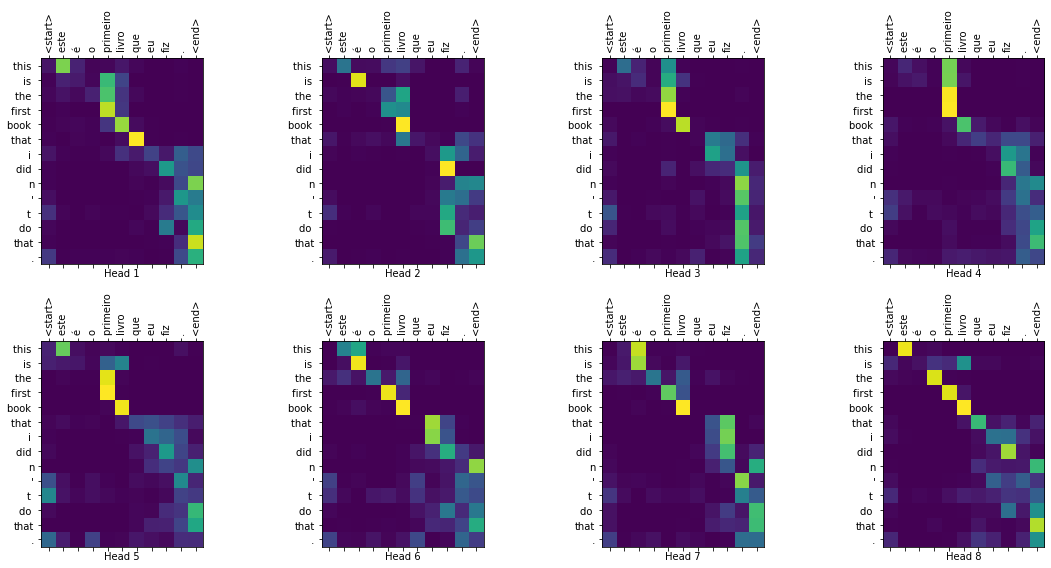

Real translation: this is the first book i've ever done.


In [61]:
translate("este é o primeiro livro que eu fiz.", plot='decoder_layer4_block2')
print ("Real translation: this is the first book i've ever done.")

## Summary

In this tutorial, you learned about positional encoding, multi-head attention, the importance of masking and how to create a transformer.

Try using a different dataset to train the transformer. You can also create the base transformer or transformer XL by changing the hyperparameters above. You can also use the layers defined here to create [BERT](https://arxiv.org/abs/1810.04805) and train state of the art models. Futhermore, you can implement beam search to get better predictions.